In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras import backend as K

import os
import shutil
import numpy as np

import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/ricardo/miniconda3/envs/sarpy/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
%matplotlib inline
import sys
sys.path.append('..')

In [3]:
from sarpy.datasets import load_emnist

# Loading the dataset

In [14]:
X_train, y_train, X_test, y_test, X_valid, y_valid, mapping, nb_classes = load_emnist('mnist', validation=True)

reshape testing: 100%|██████████| 10000/10000 [00:00<00:00, 69206.09it/s]


Train size: 50000
Test size: 10000
Validation size: 10000
# classes: 10


# Converting class vectors to binary class matrices

In [15]:
y_train = keras.utils.to_categorical(y_train, nb_classes)
y_test = keras.utils.to_categorical(y_test, nb_classes)
if y_valid is not None:
    y_valid = keras.utils.to_categorical(y_valid, nb_classes)
else:
    y_valid = keras.utils.to_categorical(y_test, nb_classes)

In [19]:
batch_size = 128
epochs = 2

nodes = 128
input_shape = X_train.shape[1:]

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 40s 806us/step - loss: 7.4015 - acc: 0.5233 - val_loss: 2.1659 - val_acc: 0.8524
Epoch 2/2
50000/50000 [==============================] - 35s 697us/step - loss: 0.9495 - acc: 0.8859 - val_loss: 0.0963 - val_acc: 0.9748


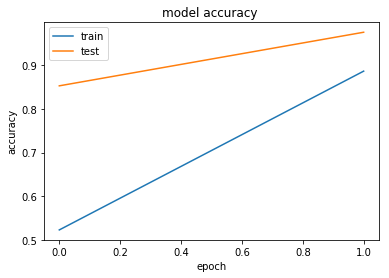

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

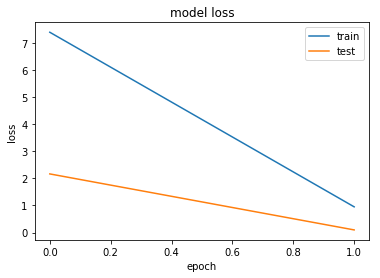

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [22]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 5s 463us/step
Test loss: 0.09901261933362111
Test accuracy: 0.9727
